<a href="https://colab.research.google.com/github/adirfjuly1/MOD-711/blob/main/Clustering_Algortimo_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algortimo Hierarchical Clustering


## 1. Descripción

El algoritmo Hierarchical Clustering (Agrupamiento Jerárquico) es un enfoque de clustering utilizado para agrupar datos en una estructura jerárquica de clústeres. A diferencia de otros métodos de clustering, el Clustering Jerarquico no requiere que especifiques el número de clústeres de antemano. En cambio, crea una jerarquía de clústeres donde los clústeres más pequeños están contenidos dentro de clústeres más grandes, formando un árbol o dendrograma.

## 2. Birtex y Referencias:

* @article{berzal2017clustering,
  title={Clustering jer{\'a}rquico},
  author={Berzal, Fernando},
  journal={Universidad de Granada,[En l{\'\i}nea]. Available: https://elvex. ugr. es/idbis/dm/slides/42\% 20Clustering},
  year={2017}
}

## 3. Tipo de Modelo:

**Método de Aprendizaje:**Es un método de aprendizaje no supervisado. En el aprendizaje no supervisado, el algoritmo explora patrones y estructuras en los datos sin utilizar etiquetas o resultados previos. En el caso del clustering jerárquico, los objetos se agrupan en clústeres en función de su similitud, sin que se proporcionen etiquetas o categorías de antemano.

**Por Parámetro:** Clustering Jerárquico es un enfoque que no se basa en parámetros que se optimizan durante el entrenamiento. No ajusta parámetros internos del algoritmo según los datos de entrada. Más bien, requiere que tomes decisiones sobre cómo se llevará a cabo el proceso de agrupamiento, como la elección de métodos de enlace, métricas de distancia y criterios de corte.

**Datos de Aprendizaje:** Funciona en un enfoque "offline"  lo que significa que opera en un conjunto de datos fijo y no se adapta a nuevos datos que llegan de manera continua.

**Resultado del Entrenamiento:** Ealgoritmo de Clustering Jerárquico no es un "modelo" ya que el resultado es una estructura jerárquica de clústeres que puede representarse visualmente a través de un dendrograma.


## 4. Algoritmos de Entrenamiento:

•	BIRCH: Balanced Iterative Reducing and Clustering using Hierarchies (Zhang, Ramakrishnan & Livny, SIGMOD’1996)

•	CURE: Clustering Using REpresentatives (Guha, Rastogi & Shim, SIGMOD’1998)

•	ROCK: RObust Clustering using linKs (Guha, Rastogi & Shim, ICDE’1999)

•	CHAMELEON: Hierarchical Clustering Using Dynamic Modeling (Karypis, Han & Kumar, 1999)

BIRCH: Se basa en una estructura de datos jerárquica llamada CF Tree [Clustering Feature Tree]

FASE 1: Se construye un árbol CF inicial en memoria (compresión “multi-nivel” de los datos que intenta preservar la estructura de los agrupamientos del conjunto de datos original).

FASE 2: Se utiliza un algoritmo de clustering arbitrario para agrupar los nodos hoja del árbol CF (p.ej. cualquier algoritmo jerárquico aglomerativo). Clustering Feature (CF): CF = (N, LS, SS) N: Number of data points LS: linear sum of N points SS: square sum of N points.

El árbol CF es un árbol balanceado en el que los nodos internos almacenan las sumas de los CFs de sus descendientes.

Un árbol CF tiene dos parámetros: el número máximo de hijos de un nodo y el diámetro máximo de los subclusters almacenados en las hojas del árbol.

Para cada punto, se encuentra la hoja más cercana, se añade a su cluster y se actualiza su CF. Si el diámetro del subcluster es mayor que el diámetro máximo admitido, se divide la hoja (y puede que sus ascendientes).

ROCK [Agrupación robusta mediante enlaces]:
Número de vecinos compartidos Una medida de similitud más:


## 5. Supuestos y Restricciones:


El algoritmo de Clustering Jerárquico no está basado en supuestos específicos como algunos algoritmos de regresión o clasificación. Sin embargo, hay algunas consideraciones y restricciones que debes tener en cuenta al utilizar este enfoque:

**1. Métrica de Distancia :**
Debes elegir una métrica de distancia adecuada para calcular la similitud entre puntos de datos o clústeres. La elección de la métrica puede afectar los resultados del agrupamiento. Es importante seleccionar una métrica que tenga sentido para tus datos y el problema que estás abordando.

**2. Sensibilidad a la Escala:**
El Clustering Jerárquico puede ser sensible a la escala de las variables. Si algunas variables tienen escalas muy diferentes, es posible que la métrica de distancia sea dominada por las variables con mayor escala. La normalización o estandarización de los datos puede ser necesaria para mitigar este problema.

**3. Complejidad Computacional:**
El Clustering Jerárquico puede volverse computacionalmente intensivo, especialmente en conjuntos de datos grandes. El cálculo de distancias y la construcción del dendrograma pueden requerir mucho tiempo y recursos en datasets extensos.

**4. Elección del Método de Enlace:**
Debes decidir qué método de enlace utilizar para calcular la distancia entre clústeres durante el proceso de agrupamiento. Los diferentes métodos pueden conducir a agrupamientos ligeramente diferentes. La elección del método de enlace puede depender de la estructura de tus datos y tus objetivos.

**5. Interpretación del Dendrograma:**
Interpretar el dendrograma puede ser subjetivo y depende de tus objetivos de análisis. Decidir dónde cortar el dendrograma para formar clústeres puede afectar la interpretación de los resultados. No hay una regla estricta para determinar cuántos clústeres son los adecuados.

**6. No Adaptable en Línea:**
El Clustering Jerárquico no se adapta bien a nuevos datos en tiempo real. Una vez que se construye el dendrograma, es difícil agregar nuevos datos o ajustar los clústeres de manera eficiente.



## Ejemplo

## DESCRIPCION DEL DATA SET **CC GENERAL.csv**

**PURCHASES:** Monto total de compras realizadas.

**ONEOFF_PURCHASES:** Monto de compras únicas (no a plazos).

**INSTALLMENTS_PURCHASES:** Monto de compras a plazos.

**CASH_ADVANCE:** Monto de adelanto de efectivo.

**PURCHASES_FREQUENCY:** Frecuencia de compras.

**ONEOFF_PURCHASES_FREQUENCY:** Frecuencia de compras únicas.

**PURCHASES_INSTALLMENTS_FREQUENCY:** Frecuencia de compras a plazos.

**CASH_ADVANCE_FREQUENCY:** Frecuencia de adelanto de efectivo.

**CASH_ADVANCE_TRX:** Número de transacciones de adelanto de efectivo.

**PURCHASES_TRX:** Número de transacciones de compras.

**CREDIT_LIMIT:** Límite de crédito.

**PAYMENTS:** Monto total de pagos realizados.

**MINIMUM_PAYMENTS:** Pago mínimo requerido.

**PRC_FULL_PAYMENT:** Porcentaje de pago total.

**TENURE:** Duración de la cuenta en meses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
raw_df = pd.read_csv('../datasets_ml/datos_cuentas.csv')
raw_df = raw_df.drop('CUST_ID', axis = 1)
raw_df.fillna(method ='ffill', inplace = True)
raw_df.head(10)

C:\Users\javi_\AppData\Local\Temp\ipykernel_17432\1055161608.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df.fillna(method ='ffill', inplace = True)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


# **Realizando un análisis exploratorio de datos:**

In [ ]:
# Obtener estadísticas descriptivas de los campos numéricos
print(raw_df.describe())
# Obtener información sobre los tipos de datos y los valores no nulos
print(raw_df.info())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

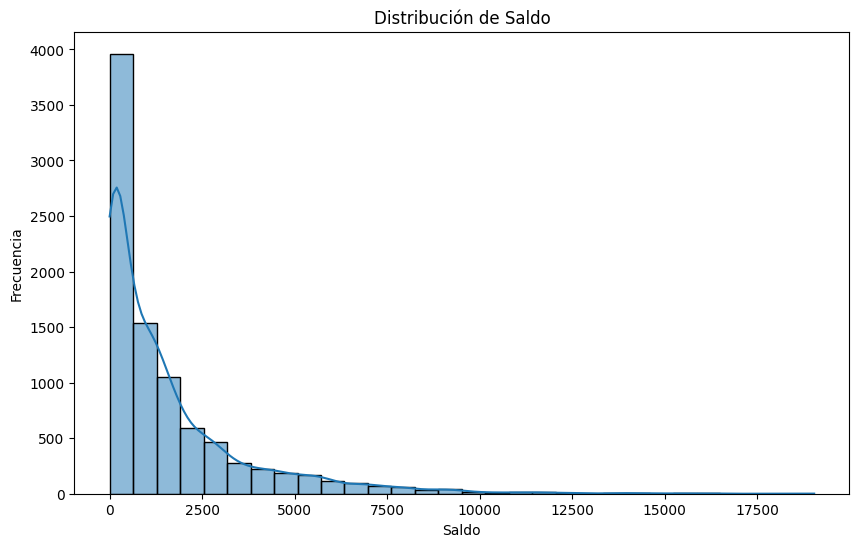

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas de algunas variables numéricas
plt.figure(figsize=(10, 6))
sns.histplot(data=raw_df, x='BALANCE', bins=30, kde=True)
plt.title('Distribución de Saldo')
plt.xlabel('Saldo')
plt.ylabel('Frecuencia')
plt.show()


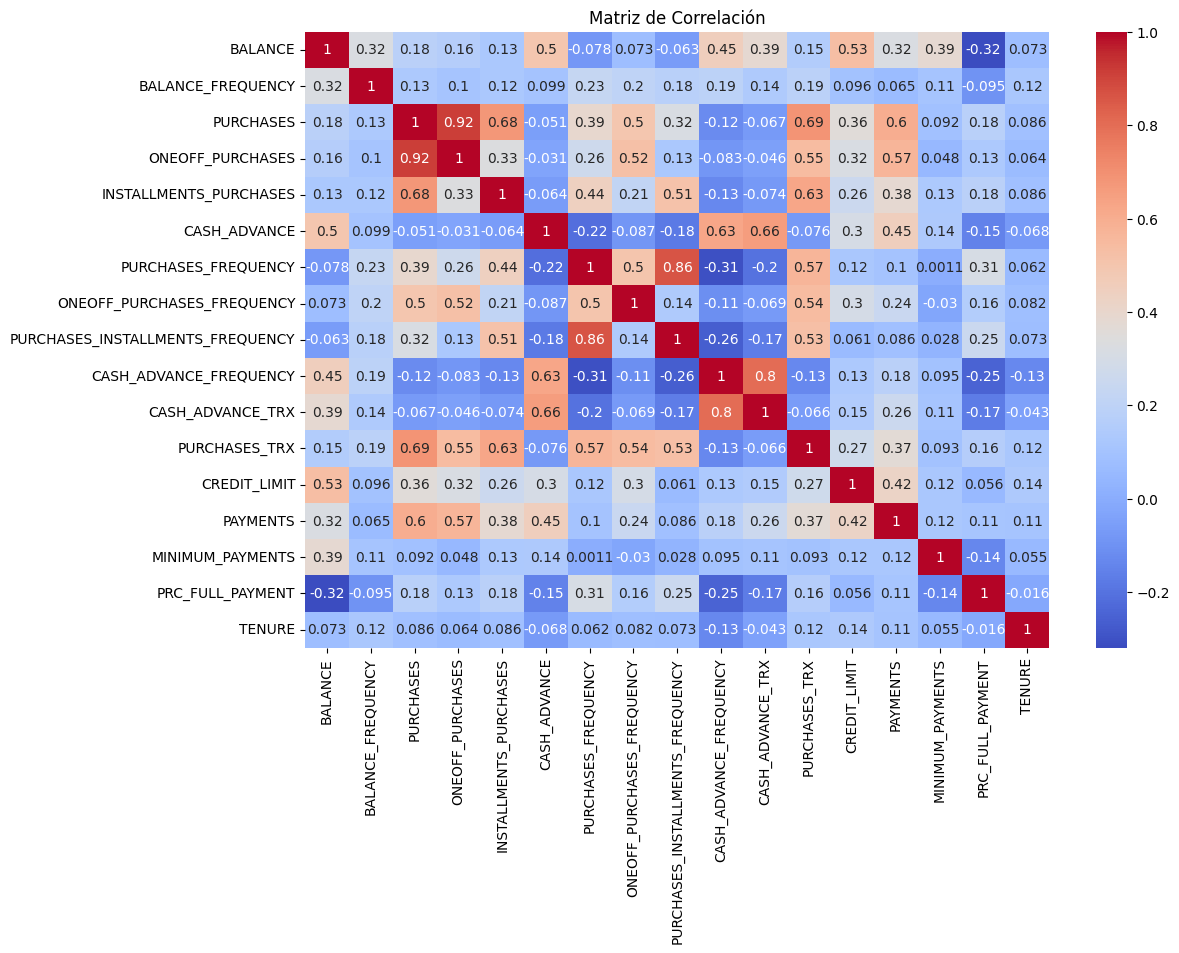

In [ ]:
# Matriz de correlación
correlation_matrix = raw_df.corr()

# Mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


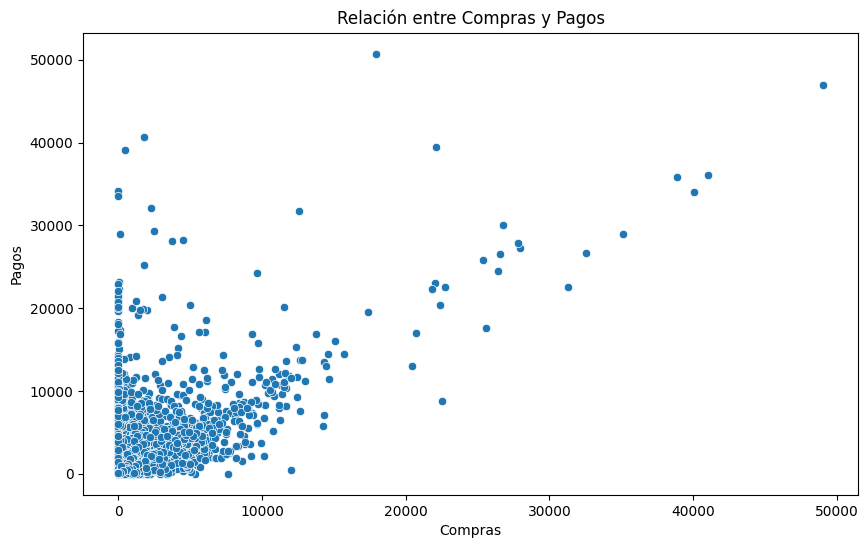

In [ ]:
# Gráfico de dispersión entre dos variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw_df, x='PURCHASES', y='PAYMENTS')
plt.title('Relación entre Compras y Pagos')
plt.xlabel('Compras')
plt.ylabel('Pagos')
plt.show()


# Estandarización del conjunto de datos.

StandardScaler(): Es una clase de la librería sklearn.preprocessing que se utiliza para realizar la estandarización de características.


In [ ]:
# Standardize data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(raw_df)

El resultado, almacenado en scaled_df, es una nueva matriz que contiene los datos originales después de haber sido estandarizados. Ahora las características tienen una media de cero y una desviación estándar de uno.

# Normalizción de los datos.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas para el clustering
selected_columns = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']

# Normalizar los datos
scaler = StandardScaler()
normalized_data = scaler.fit_transform(raw_df[selected_columns])


# Aplicación del Clustering Jerárquico.

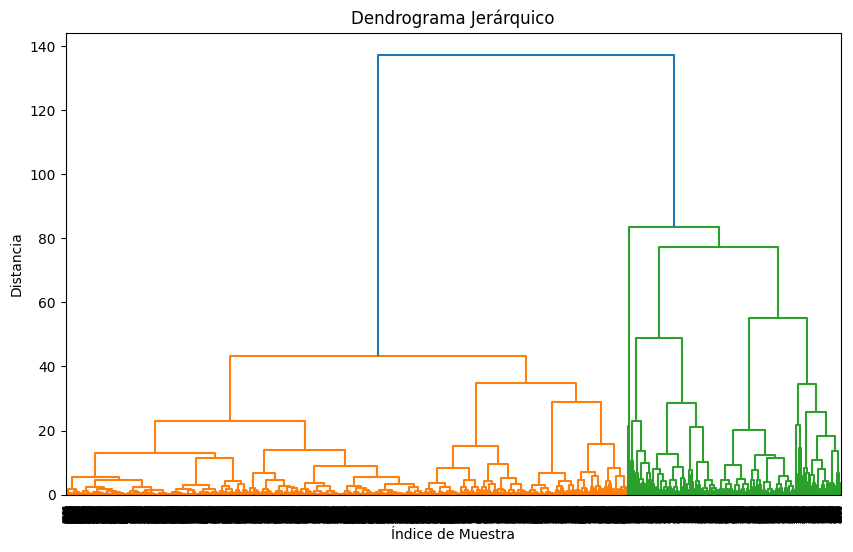

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calcular la matriz de enlace
linkage_matrix = linkage(normalized_data, method='ward')

# Mostrar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrograma Jerárquico')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()


# Obtención de Etiquetas de Clúster

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Definir el corte
cutoff = 3  # Ajusta este valor según el corte que elijas

# Obtener las etiquetas de clúster
cluster_labels = fcluster(linkage_matrix, cutoff, criterion='distance')

# Análisis de Clústeres

In [ ]:
# Agregar etiquetas de clúster al DataFrame
raw_df['Cluster'] = cluster_labels

# Calcular estadísticas de cada clúster
cluster_statistics = raw_df.groupby('Cluster').mean()

print(cluster_statistics)


             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
1         177.264932           0.842091   837.593405        341.513676   
2          99.249598           0.686460   178.298004         55.988550   
3          88.264777           0.692475   248.047382         61.777264   
4          93.437472           0.650181   254.396098         70.714428   
5         343.421708           0.855920  1074.809126        560.681858   
...              ...                ...          ...               ...   
132      4095.511696           0.981818   176.727750        119.060000   
133      5606.523191           0.991736  2622.077273       1563.797273   
134      4932.323649           0.965909  1471.797500        704.072500   
135      7791.805632           1.000000   714.267778        454.929444   
136      7875.546427           1.000000   582.438462        357.856923   

         INSTALLMENTS_PURCHASES  CASH